In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import usual suspects

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# import other useful stuff

from IPython.display import display
from sklearn.metrics import mutual_info_score

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
# put data into data frame
df = pd.read_csv("/Users/Erol/Documents/train data credit card.csv")

In [6]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Data Preparation and Data Cleaning

In [7]:
# check column data types

df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [8]:
# lower case column names

df.columns = df.columns.str.lower()

In [9]:
# define categorical and numerical columns

categorical = ['gender', 'region_code', 'occupation', 'channel_code', 'credit_product', 'is_active']
numerical = ['age', 'vintage', 'avg_account_balance']

In [10]:
# lower case and eliminate space in data records

for col in df[categorical].columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
# check null values

df.isnull().sum()

id                         0
gender                     0
age                        0
region_code                0
occupation                 0
channel_code               0
vintage                    0
credit_product         29325
avg_account_balance        0
is_active                  0
is_lead                    0
dtype: int64

In [12]:
# assign new category 'Unk' to null values

df['credit_product'] = df['credit_product'].fillna('Unk')

In [13]:
# check unique entries in categorical features

for col in df[categorical].columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print()

gender
['female' 'male']
2

region_code
['rg268' 'rg277' 'rg270' 'rg282' 'rg261' 'rg265' 'rg283' 'rg254' 'rg269'
 'rg257' 'rg279' 'rg280' 'rg252' 'rg284' 'rg259' 'rg281' 'rg258' 'rg266'
 'rg260' 'rg274' 'rg256' 'rg275' 'rg273' 'rg267' 'rg272' 'rg251' 'rg262'
 'rg264' 'rg278' 'rg276' 'rg263' 'rg250' 'rg255' 'rg253' 'rg271']
35

occupation
['other' 'salaried' 'self_employed' 'entrepreneur']
4

channel_code
['x3' 'x1' 'x2' 'x4']
4

credit_product
['no' 'Unk' 'yes']
3

is_active
['no' 'yes']
2



In [14]:
# check number of unique entries represented in data

for col in df[categorical].columns:
    print(col)
    print(df[col].value_counts())
    print()

gender
male      134197
female    111528
Name: gender, dtype: int64

region_code
rg268    35934
rg283    29416
rg254    26840
rg284    19320
rg277    12826
rg280    12775
rg269     7863
rg270     7720
rg261     7633
rg257     6101
rg251     5950
rg282     5829
rg274     5286
rg272     5252
rg281     5093
rg273     4497
rg252     4286
rg279     3976
rg263     3687
rg275     3245
rg260     3110
rg256     2847
rg264     2793
rg276     2764
rg259     2586
rg250     2496
rg255     2018
rg258     1951
rg253     1858
rg278     1822
rg262     1788
rg266     1578
rg265     1546
rg271     1542
rg267     1497
Name: region_code, dtype: int64

occupation
self_employed    100886
salaried          71999
other             70173
entrepreneur       2667
Name: occupation, dtype: int64

channel_code
x1    103718
x3     68712
x2     67726
x4      5569
Name: channel_code, dtype: int64

credit_product
no     144357
yes     72043
Unk     29325
Name: credit_product, dtype: int64

is_active
no     150290
yes   

# Train, Validation, Test Split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [16]:
df_full_train.head()

,id,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,is_lead
76936,DYPRUJEZ,female,48,rg257,self_employed,x3,15,yes,1895201,no,0
98532,CMMNPGBX,female,72,rg251,other,x1,32,no,614812,no,0
116257,7GPR8FDR,male,29,rg281,salaried,x1,21,no,1057115,yes,0
95211,PNIHQCNJ,male,37,rg272,self_employed,x2,38,no,762471,yes,0
173053,VKRGQFTM,female,57,rg251,self_employed,x1,20,no,441991,no,0


In [17]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train['is_lead']
y_val = df_val['is_lead']
y_test = df_test['is_lead']

In [19]:
y_full_train = df_full_train['is_lead']
del df_full_train['is_lead']

del df_test['is_lead']

# EDA & Feature Importance Analysis

In [20]:
# run EDA on train set
# check distribution of target - 'is_lead'
# it seems to be an unbalanced dataset

df_train['is_lead'].value_counts(normalize=False)

0    112506
1     34929
Name: is_lead, dtype: int64

In [21]:
# calculate the weight of target

is_lead_overall = df_train['is_lead'].mean()
is_lead_overall

0.23691118119849425

In [22]:
# check categories' target distribution to gain insight about data
# gender and occupation can be mildly important
# whereas some of the regions seem important
# as well as channel code  
# and not having a credit product

for c in categorical:
    df_group = df_train.groupby(c)['is_lead'].agg(['mean', 'count'])
    df_group['opportunity'] = df_group['mean'] / is_lead_overall
    display(df_group.sort_values(by='mean', ascending=False))
    print()
    print()

,mean,count,opportunity
gender,,,
male,0.265366,80387,1.120109
female,0.202795,67048,0.855996


,mean,count,opportunity
region_code,,,
rg283,0.300860,17666,1.269929
rg284,0.299474,11597,1.264077
rg268,0.298684,21588,1.260744
rg276,0.279139,1673,1.178244
rg253,0.268577,1117,1.133659
rg265,0.265439,923,1.120415
rg263,0.233363,2254,0.985023
rg258,0.232112,1146,0.979741
rg280,0.231495,7633,0.977138


,mean,count,opportunity
occupation,,,
entrepreneur,0.661280,1609,2.791258
self_employed,0.275159,60525,1.161444
other,0.243956,42192,1.029737
salaried,0.160477,43109,0.677372


,mean,count,opportunity
channel_code,,,
x3,0.367916,41186,1.552971
x2,0.327506,40616,1.382402
x4,0.245441,3345,1.036004
x1,0.090756,62288,0.383080


,mean,count,opportunity
credit_product,,,
Unk,0.851592,17553,3.594564
yes,0.314451,43444,1.327294
no,0.073116,86438,0.308622


,mean,count,opportunity
is_active,,,
yes,0.282973,57175,1.194428
no,0.207733,90260,0.876840


In [23]:
# check mutual_info_score

def mutual_info_lead_score(series):
    return mutual_info_score(series, df_train['is_lead'])

In [24]:
# having a credit product and channel code are important features
# though region itself do not seem to matter 

mi = df_train[categorical].apply(mutual_info_lead_score)
mi.sort_values(ascending=False)

credit_product    0.160649
channel_code      0.048314
occupation        0.011204
region_code       0.008029
is_active         0.003669
gender            0.002706
dtype: float64

In [25]:
# check distribution of numerical values

df_train[numerical].describe()

,age,vintage,avg_account_balance
count,147435.000000,147435.000000,1.474350e+05
mean,43.864449,46.929677,1.129896e+06
std,14.843806,32.322448,8.558454e+05
min,23.000000,7.000000,4.565700e+04
25%,30.000000,20.000000,6.038910e+05
50%,43.000000,32.000000,8.923940e+05
75%,54.000000,73.000000,1.366332e+06
max,85.000000,135.000000,1.035201e+07


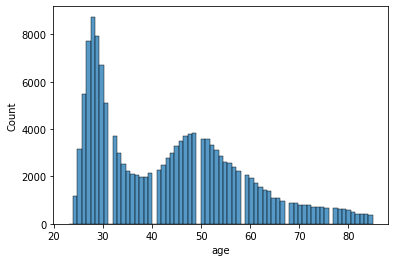

In [26]:
sns.histplot(data=df_train, x="age")

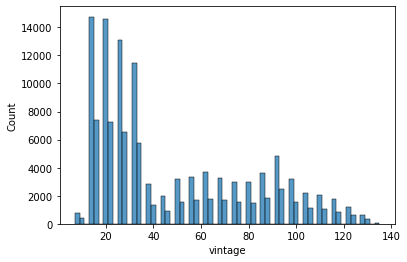

In [27]:
sns.histplot(data=df_train, x="vintage")

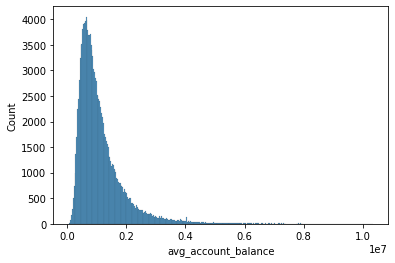

In [28]:
sns.histplot(data=df_train, x="avg_account_balance")

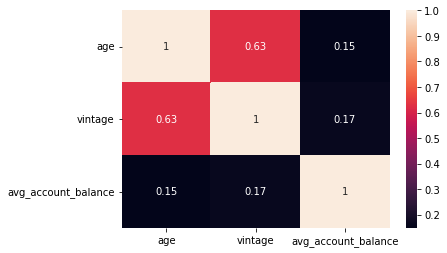

In [29]:
# there is correlation between 'age' and 'vintage'
# yet these are different features
# therefore, there is no need to eliminate one of the features

sns.heatmap(df_train[numerical].corr(),annot = True)

In [30]:
# all numerical features seem to have effect on target

df_train[numerical].corrwith(df_train['is_lead']).abs()

age                    0.229895
vintage                0.278492
avg_account_balance    0.051835
dtype: float64

In [31]:
# eliminate less important features and redefine categorical columns

categorical = ['occupation', 'channel_code', 'credit_product']

In [32]:
# make baseline prediction with Logistic Regression to decide to continue feature engineering

# define train function
def train(df, y, C=1.0):
    dicts = df[train_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='lbfgs', C=C, max_iter=1000)
    model.fit(X_train, y)
    
    return dv, model

In [33]:
# define train function

def predict(df, dv, model):
    dicts = df[train_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [34]:
# make baseline prediction & return roc_auc_score

train_columns = categorical + numerical
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)
#accuracy_score(y_val, y_pred >= 0.5)
roc_auc_score(y_val, y_pred)

0.4478617195343775

In [35]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

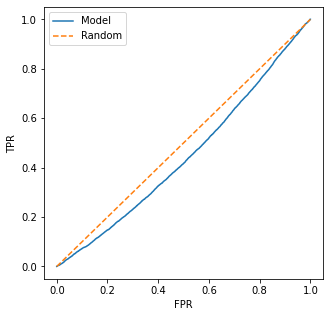

In [36]:
# poor performance of the base model

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# Feature Engineering

In [125]:
# group 'age' under 'age_cat' feature
# group 'vintage' under 'vintage_cat' feature
# group 'avg_account_balance' under 'avg_account_balance_cat' feature

def cat(df):
    df['age_cat'] = pd.cut(df['age'],bins=[20,29,39,49,59,69,79,89],
       labels=['20-29','30-39','40-49','50-59','60-69','70-79','80-89'])
    df['vintage_cat'] = pd.cut(df['vintage'],bins=[0,19,39,59,79,99,119,139],
       labels=['0-19','20-39','40-59','60-79','80-99','100-119','120-139'])
    df['avg_account_balance_cat'] = pd.qcut(df['avg_account_balance'], q=10, 
                                                  labels=['0','1','2','3','4','5','6','7','8','9'])

In [ ]:
cat(df_train)
cat(df_val)
cat(df_test)
cat(df_full_train)

In [126]:
# redefine categorical columns

categorical = ['occupation', 'channel_code', 'credit_product', 'age_cat','vintage_cat','avg_account_balance_cat']

In [127]:
mi = df_train[categorical].apply(mutual_info_lead_score)
mi.sort_values(ascending=False)

credit_product             0.160649
channel_code               0.048314
vintage_cat                0.044572
age_cat                    0.044396
occupation                 0.011204
avg_account_balance_cat    0.002919
dtype: float64

In [128]:
categorical = ['occupation', 'channel_code', 'credit_product', 'age_cat','vintage_cat']

In [59]:
# make new prediction with new categorical features 
# to see the effect of feature engineering

train_columns = categorical
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)
#accuracy_score(y_val, y_pred >= 0.5)
roc_auc_score(y_val, y_pred) # roc_auc_score improved significantly

0.8644608270385954

In [60]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

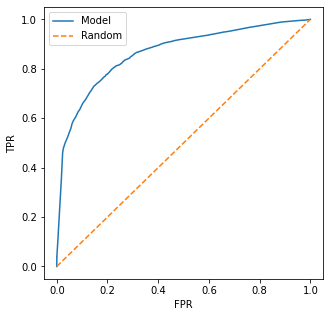

In [61]:
# display improvement with new plot

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# Train Another Model - Decision Tree

In [62]:
train_columns=categorical
train_dicts = df_train[train_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
val_dicts = df_val[train_columns].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8701467265504267

In [65]:
#from sklearn.tree import export_text
#print(export_text(dt, feature_names=dv.get_feature_names()))

# Fine Tune Models

In [66]:
# Fine tune Logistic Regression parameter C

train_columns=categorical
C_scores = []

for C in [0.01, 0.1, 1, 10]:

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred).round(4)
    C_scores.append((C, auc))

In [67]:
# choose max auc, if equal choose min C

columns = ['C', 'auc']
df_C_scores = pd.DataFrame(C_scores, columns=columns)
df_C_scores.sort_values(["auc"], ascending = (False))

,C,auc
1,0.10,0.8645
2,1.00,0.8645
3,10.00,0.8645
0,0.01,0.8644


In [68]:
# Fine tune Decision Tree parameters
# Start with 'Tree Depth'

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.703
   2 -> 0.818
   3 -> 0.843
   4 -> 0.853
   5 -> 0.860
   6 -> 0.865
  10 -> 0.869
  15 -> 0.870
  20 -> 0.870
None -> 0.870


In [69]:
# Decide 'Tree Depth' and 'Min Leaf Samples'

scores = []

for depth in [5, 6, 10, 15]: # choose max auc
    for s in [1, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [70]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [71]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values=['auc'])
df_scores_pivot.round(3) # max_depth = 10 with 20 samples in leaf is choosen

auc                     
max_depth            5      6      10     15
min_samples_leaf                            
1                 0.860  0.865  0.869  0.870
5                 0.860  0.865  0.870  0.870
10                0.860  0.865  0.870  0.870
15                0.860  0.865  0.870  0.870
20                0.860  0.865  0.870  0.870
100               0.859  0.864  0.869  0.870
200               0.859  0.863  0.868  0.869
500               0.859  0.863  0.866  0.866

# Selecting Decision Tree as Best Model

In [85]:
def train(df, y, max_depth, min_samples_leaf):
    dicts = df[train_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y)
    
    return dv, model

In [86]:
def predict(df, dv, model):
    dicts = df[train_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [89]:
# decision tree with max_depth = 10 and 20 samples in leaf is chosen

train_columns=categorical
max_depth = 10
min_samples_leaf = 20


full_train_dicts = df_full_train[train_columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(full_train_dicts)

test_dicts = df_test[train_columns].to_dict(orient='records')
X_test = dv.transform(test_dicts)


dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
dt.fit(X_full_train, y_full_train)
    
y_pred = dt.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
#y_pred
auc

0.8663289279409404

In [198]:
train_columns = categorical
max_depth = 10
min_samples_leaf = 20

dv, model = train(df_full_train, y_full_train, max_depth, min_samples_leaf)
y_pred = predict(df_test, dv, model)
#accuracy_score(y_val, y_pred >= 0.5)
roc_auc_score(y_test, y_pred) # roc_auc_score improved significantly

0.8663281358186028

# Save the Model

In [199]:
output_file = f'tree_model_depth={max_depth}.bin'
output_file

'tree_model_depth=10.bin'

In [200]:
import pickle
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)